# Answering Instacard Key Business Questions
## Contents 

### 1. Adress any PII data
### 2. Comparing customer behavior in different geographic areas
### 3. Exclude low-activity customers
### 4. Customer profiling
#### 4.1 Visualization to show the distribution of profiles
#### 4.2 Aggregating max, mean, and min variables on a customer-profile level for usage frequency and expenditure
### 5. Comparing customer profiles with regions and departments
#### 5.1 Comparing visualizations

In [72]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [73]:
path = r'/Users/sophie/Desktop/CareerFoundry /09 2023 Phython'
path

'/Users/sophie/Desktop/CareerFoundry /09 2023 Phython'

In [74]:
ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data', 'prepared data ', 'df_merge_instacard_cust.pkl'))
pd.options.display.max_columns = None
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,order_regularity,order regularity flag,average_spend,spending flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,Most orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,Most orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [75]:
ords_prods_merge.shape

(32404859, 35)

# 1. Address any PII data 
#### The names allow to identify each customer, therefore, I am going to create a new data set excluding these columns. 
#### Only deleting first names is not enough because last name and combination of other demografic info allows to trace back on  individuals.
#### In a real-case scenario, I would directly alter the data frame after consulting stakeholders/ senior data analysts with inplace=True. #### However, although I probably do not need the names again, I am careful and create a new data frame.

In [76]:
instacard = ords_prods_merge.drop(columns={'surname', 'first_name'}, inplace=False)

In [77]:
# Check
ords_prods_merge.shape

(32404859, 35)

In [78]:
instacard.shape

(32404859, 33)

# 2. Comparing customer behavior in different geographic areas
#### Creating a regional segmentation of the data as a “Region” column based on the “State” column 
#### source: https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [79]:
# Get unique values in the "State" column
unique_states = instacard['state'].unique()

# Print or use the unique values
for state in unique_states:
    print(state)

Alabama
Indiana
Louisiana
Montana
Oklahoma
Tennessee
Iowa
Ohio
Virginia
Connecticut
Kentucky
Oregon
South Dakota
Michigan
New Jersey
Arizona
Maine
Hawaii
Minnesota
Illinois
Idaho
Kansas
North Carolina
Vermont
Alaska
Delaware
Maryland
Nebraska
Nevada
Arkansas
Georgia
District of Columbia
Utah
Colorado
Florida
South Carolina
Rhode Island
Washington
California
Mississippi
Texas
New Mexico
Missouri
Wyoming
New Hampshire
Massachusetts
Pennsylvania
Wisconsin
West Virginia
North Dakota
New York


In [80]:
# Count the number of unique states in the "State" column
unique_state_count = instacard['state'].nunique()

# Print the count
print("Number of unique states:", unique_state_count)

Number of unique states: 51


#### Instacard customers are present in all 51 states of the US and hence, from Wikipedia list.
#### We can copy list from Wikipedia to Excel, add "Region_field" & "'", state field & "or", and add to respective region in a for-loop.

In [81]:
# Create a for-loop to create a region column
region = []  # Create a new empty list

for value in instacard['state']:
    if value in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        region.append("Region 1 (Northeast)")
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        region.append("Region 2 (Midwest)")
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 
                   'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        region.append("Region 3 (South)")
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
        region.append("Region 4 (West)")
    else:
        region.append("irregular")

In [82]:
instacard['region'] = region

In [83]:
# Run checks
instacard['region'].value_counts(dropna=False)

region
Region 3 (South)        10791885
Region 4 (West)          8292913
Region 2 (Midwest)       7597325
Region 1 (Northeast)     5722736
Name: count, dtype: int64

In [84]:
instacard['region'].info

<bound method Series.info of 0           Region 3 (South)
1           Region 3 (South)
2           Region 3 (South)
3           Region 3 (South)
4           Region 3 (South)
                  ...       
32404854     Region 4 (West)
32404855    Region 3 (South)
32404856    Region 3 (South)
32404857    Region 3 (South)
32404858    Region 3 (South)
Name: region, Length: 32404859, dtype: object>

In [85]:
instacard.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,order_regularity,order regularity flag,average_spend,spending flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 (South)
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 (South)
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,Most orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 (South)
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 (South)
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,Most orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 (South)


In [86]:
instacard.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,order_regularity,order regularity flag,average_spend,spending flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region
32404854,156685,106143,26,4,23,5.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Slowest days,Average orders,Average orders,26,Regular customer,7.0,Frequent customer,10.7,High spender,Male,Hawaii,25,5/26/2017,0,single,53755,both,Region 4 (West)
32404855,484769,66343,1,6,11,NaN,True,47210,1,0,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Regularly busy,Most orders,Most orders,4,New customer,30.0,Non-frequent customer,8.1,Low spender,Female,Tennessee,22,9/12/2017,3,married,46151,both,Region 3 (South)
32404856,1561557,66343,2,1,11,30.0,False,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Busiest days,Most orders,Most orders,4,New customer,30.0,Non-frequent customer,8.1,Low spender,Female,Tennessee,22,9/12/2017,3,married,46151,both,Region 3 (South)
32404857,276317,66343,3,6,15,19.0,False,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Regularly busy,Most orders,Most orders,4,New customer,30.0,Non-frequent customer,8.1,Low spender,Female,Tennessee,22,9/12/2017,3,married,46151,both,Region 3 (South)
32404858,2922475,66343,4,1,12,30.0,False,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Busiest days,Average orders,Most orders,4,New customer,30.0,Non-frequent customer,8.1,Low spender,Female,Tennessee,22,9/12/2017,3,married,46151,both,Region 3 (South)


In [87]:
# Further checks
# mississippi_instacard = instacard[instacard['state'] == 'Mississippi'].head(10)
# print(mississippi_instacard)

#### Visualize as stacked bar chart: difference in spending habits between the different U.S. regions

In [88]:
# Import necessary package
import matplotlib.pyplot as plt

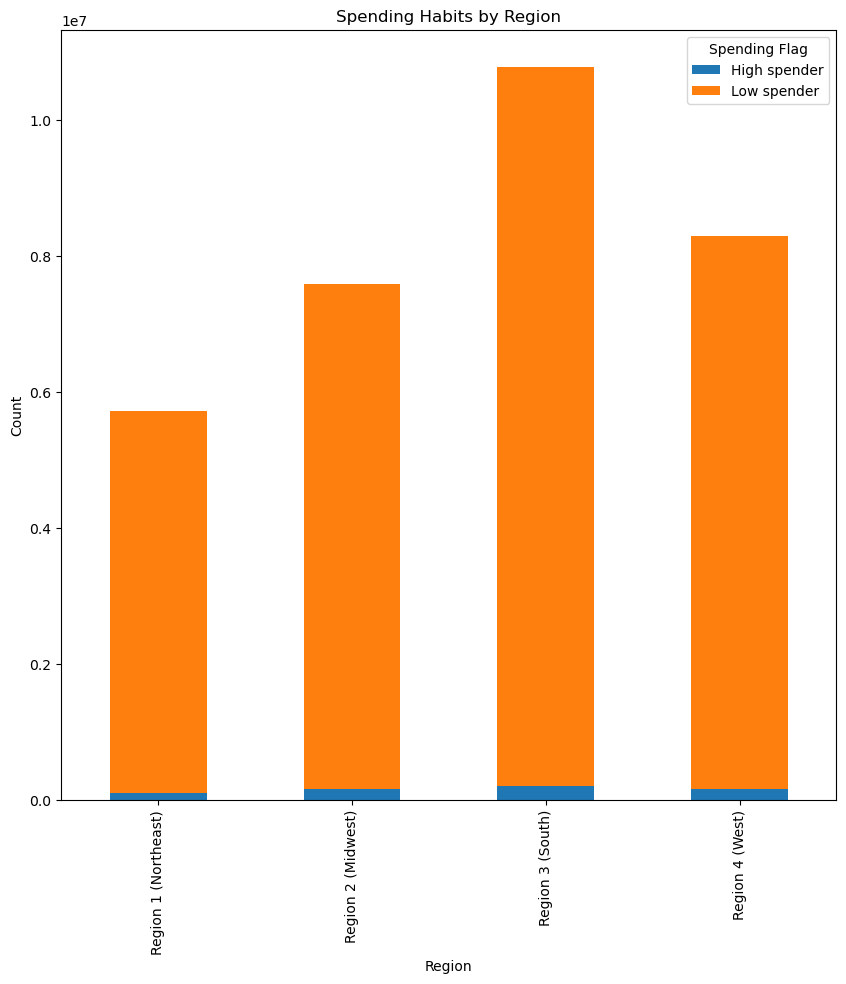

In [89]:
# Create a cross-tabulation (contingency table) of the two categorical variables
cross_tab = pd.crosstab(instacard['region'], instacard['spending flag'])

# Create a stacked bar chart to visualize the relationship
fig, ax = plt.subplots(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 10), ax=ax)
plt.title('Spending Habits by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Spending Flag', loc='upper right')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'spending_region.png'))
plt.show()

#### Testing significant differences via Chi-squared test

In [90]:
# Install necessary package
!pip install scipy

In [91]:
from scipy.stats import chi2_contingency

In [92]:
# Perform the Chi-Square Test with contigency table from above
chi2, p, _, _ = chi2_contingency(cross_tab)

# Check if the p-value is below a significance level (0.05) to determine significance
significance_level = 0.05
if p < significance_level:
    print("There is a significant difference in spending habits between regions.")
else:
    print("There is no significant difference in spending habits between regions.")

There is a significant difference in spending habits between regions.


In [93]:
print(cross_tab)

spending flag         High spender  Low spender
region                                         
Region 1 (Northeast)        108225      5614511
Region 2 (Midwest)          155975      7441350
Region 3 (South)            209691     10582194
Region 4 (West)             160354      8132559


# 3. Exclude low-activity customers
#### Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 
#### Make sure you export this sample.

In [94]:
# Deriving Columns with loc()
# If the max order number is lower than 5, then flag them as a “Low-activity customer.”
# If the max oder number is higher than or equal to 5, then flag them as a “High-activity customer.”

instacard.loc[instacard['max_order'] < 5, 'activity flag'] = 'low_activity customer'
instacard.loc[instacard['max_order'] >= 5, 'activity flag'] = 'high_activity customer'

In [95]:
# Run checks
instacard[['max_order', 'activity flag']].head(20)

,max_order,activity flag
0,10,high_activity customer
1,10,high_activity customer
2,10,high_activity customer
3,10,high_activity customer
4,10,high_activity customer
5,10,high_activity customer
6,10,high_activity customer
7,10,high_activity customer
8,10,high_activity customer
9,10,high_activity customer


In [96]:
instacard[['max_order', 'activity flag']].tail(20)

,max_order,activity flag
32404839,26,high_activity customer
32404840,26,high_activity customer
32404841,26,high_activity customer
32404842,26,high_activity customer
32404843,26,high_activity customer
32404844,26,high_activity customer
32404845,26,high_activity customer
32404846,26,high_activity customer
32404847,26,high_activity customer
32404848,26,high_activity customer


In [97]:
# Count unique customers 
instacard.groupby(['activity flag']).user_id.nunique()

activity flag
high_activity customer    162631
low_activity customer      43578
Name: user_id, dtype: int64

In [98]:
# Counting by orders 

instacard['activity flag'].value_counts(dropna = False)

activity flag
high_activity customer    30964564
low_activity customer      1440295
Name: count, dtype: int64

In [99]:
# Exclude low-acitivity customers, export the data set

# Filter out the low activity customers
low_activity_df = instacard[instacard['activity flag'] == 'low_activity customer']

# Filter out the high activity customers
high_activity_df = instacard[instacard['activity flag'] == 'high_activity customer']

In [100]:
# Checks
low_activity_df.shape

(1440295, 35)

In [101]:
high_activity_df.shape

(30964564, 35)

In [102]:
# Export the excluded sample and the high-activity sample for the CFO to new datasets (pickle file) 
low_activity_df.to_pickle(os.path.join(path, 'Data', 'prepared data ', 'low_activity_df.pkl'))

In [103]:
high_activity_df.to_pickle(os.path.join(path, 'Data', 'prepared data ', 'high_activity_df.pkl'))

# Note: here, I would ask the CFO if they wish the data set already grouped by "customers" or if the data grain order_id is alright.

# 4. Customer profiling

#### Creating a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents, “orders_day_of_the_week” and “order_hour_of_day” columns.

#### Age: 
"Young Adult" (Age < 35),
"Middle-Aged" (Age: 35-60),
"Senior Citizen" (Age > 60)

#### Income (https://www.pewresearch.org/short-reads/2020/07/23/are-you-in-the-american-middle-class/#:~:text=In%202018%2C%20the%20national%20middle,(incomes%20in%202018%20dollars):
"Low income" (< 48,500),  
"Medium income" (48500 - $145500), 
"high income" (>145500)

#### Goods from department:
"Pet Owner" (8), 
"Young Parents" (18), 
"Carnivor" (12), 
"Prepper" (1, 15, 13, 9), 
"Foodie" (20), 
"Partyperson" (5, 19),
"Breakfast Person" (14, 16)

#### Number of Dependents:
"Single Adult" (0 dependents), 
"Young Parent" (1-2 dependents), 
"Large Family" (>3 dependents)

#### Orders Day of the Week (0 = Saturday, Project Brief)
"Weekend Shopper" (orders_day_of_week: 0, 1), 
"End of Week" (orders_day_of_week: 5, 6), 
"Beginning of Week" (orders_day_of_week: 2, 3)

#### Order Hour of the Day
"Early Bird" (order_hour_of_day: 5 to 10), 
"Night Owl" (order_hour_of_day: 12 to 4)

In [104]:
# Preparations
# merge "department" column from departments_wrangled.csv to get the respective department to every department_id

departments = pd.read_csv(os.path.join(path, 'Data', 'prepared data ', 'departments_wrangled.csv'))
departments.head(30)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [105]:
# Rename column 
departments = departments.rename(columns = {'Unnamed: 0' : 'department_id'})

In [106]:
# Merge only the "column_to_merge" from df2 into df1 using the 'ID' column as the key
# Merge with df including only high-activity customers
merged_df = pd.merge(high_activity_df, departments[['department_id', 'department']], on='department_id', how='left')

# Display the merged DataFrame
merged_df.head(30)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,order_regularity,order regularity flag,average_spend,spending flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,activity flag,department
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 (South),high_activity customer,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 (South),high_activity customer,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,Most orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 (South),high_activity customer,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 (South),high_activity customer,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,Most orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 (South),high_activity customer,beverages
5,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 (South),high_activity customer,beverages
6,550135,1,7,1,9,20.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 (South),high_activity customer,beverages
7,3108588,1,8,1,14,14.0,False,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,Most orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 (South),high_activity customer,beverages
8,2295261,1,9,1,16,0.0,False,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 (South),high_activity customer,beverages
9,2550362,1,10,4,8,30.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,Average orders,10,New customer,20.5,Non-frequent customer,6.367797,Low spender,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 (South),high_activity customer,beverages


In [107]:
# Run checks
merged_df[['department', 'department_id']].value_counts(dropna = False)

department       department_id
produce          4                9079273
dairy eggs       16               5177182
snacks           19               2766406
beverages        7                2571901
frozen           1                2121731
pantry           13               1782705
bakery           3                1120828
canned goods     15               1012074
deli             20               1003834
dry goods pasta  9                 822136
household        17                699857
meat seafood     12                674781
breakfast        14                670850
personal care    11                424306
babies           18                410392
international    6                 255991
alcohol          5                 144627
pets             8                  93060
missing          21                 64768
other            2                  34411
bulk             10                 33451
Name: count, dtype: int64

In [108]:
merged_df.shape

(30964564, 36)

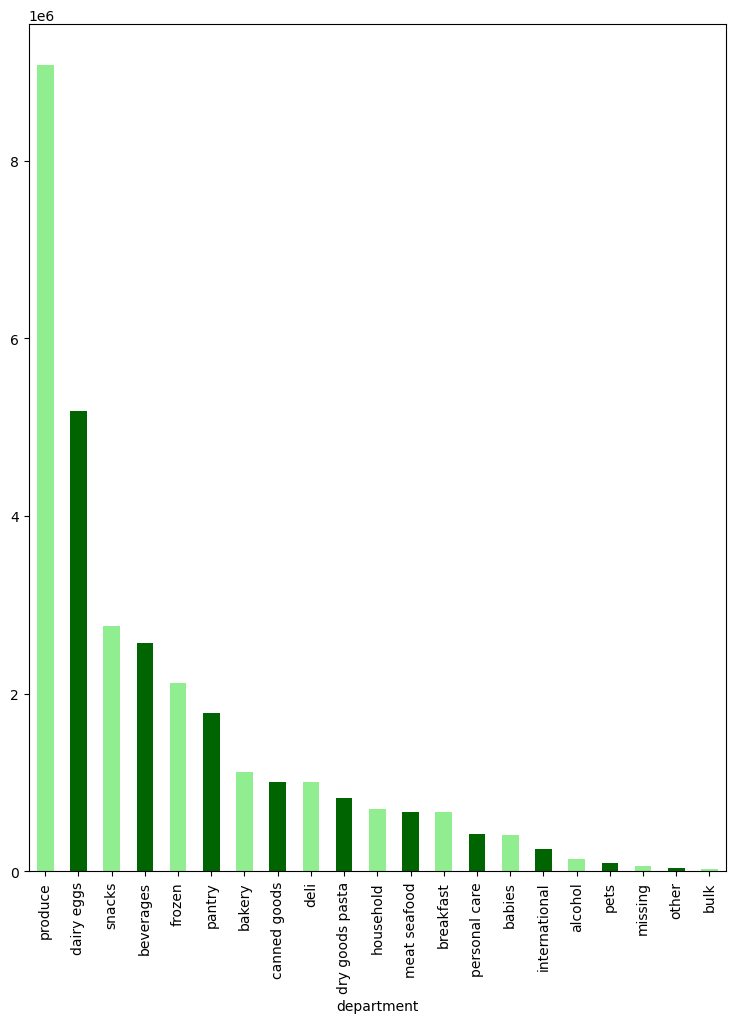

In [109]:
# Create a bar chart
# Bar charts make it easy to determine how the observations in the data set are distributed among the categories of a variable

dep_bar = merged_df['department'].value_counts().plot.bar(color = ['lightgreen', 'darkgreen'], figsize=(9, 11))
dep_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dep_bar.png'))

In [110]:
merged_df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_hours', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'order_regularity', 'order regularity flag',
       'average_spend', 'spending flag', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', '_merge',
       'region', 'activity flag', 'department'],
      dtype='object')

In [111]:
# Define conditions for different profiles based on criteria
# Age and income separate
merged_df.loc[merged_df['age'] < 35, 'profile_age'] = 'Young Adult'
merged_df.loc[(merged_df['age'] >= 35) & (merged_df['age'] <= 60),'profile_age'] = 'Middle-Aged Adult'
merged_df.loc[merged_df['age'] > 60, 'profile_age'] = 'Old Adult'

In [112]:
# Define conditions for different profiles based on criteria
# Age and income separate
merged_df.loc[merged_df['income'] < 48500, 'profile_inc'] = 'Low Income'
merged_df.loc[(merged_df['income'] >=  48500) & (merged_df['income'] < 145500), 'profile_inc'] = 'Moderate Income'
merged_df.loc[merged_df['income'] >= 145500, 'profile_inc'] = 'High Income'

In [113]:
# Age and income combined
merged_df.loc[(merged_df['age'] < 35) & (merged_df['income'] < 48500), 'profile_age_inc'] = 'Young Adult (Low Income)'
merged_df.loc[(merged_df['age'] < 35) & (merged_df['income'] >= 145500), 'profile_age_inc'] = 'Young Adult (High Income)'
merged_df.loc[(merged_df['age'] >= 35) & (merged_df['age'] <= 60) & (merged_df['income'] >= 48500) & (merged_df['income'] < 145500), 'profile_age_inc'] = 'Middle-Aged (Moderate Income)'
merged_df.loc[(merged_df['age'] > 60) & (merged_df['income'] >= 48500) & (merged_df['income'] < 145500), 'profile_age_inc'] = 'Senior Citizen (Moderate Income)'

In [114]:
# Household size
merged_df.loc[merged_df['n_dependants'] == 0, 'profile_dep'] = 'Single Household'
merged_df.loc[(merged_df['n_dependants'] >=1) & (merged_df['n_dependants'] < 3), 'profile_dep'] = 'Small Family'
merged_df.loc[merged_df['n_dependants'] >= 3, 'profile_dep'] = 'Large Family'

In [115]:
# Lifestyle
merged_df.loc[merged_df['department_id'] == 8, 'profile_life'] = 'Pet Owner'
merged_df.loc[merged_df['department_id'] == 18, 'profile_life'] = 'Young Parents'
merged_df.loc[merged_df['department_id'] == 12, 'profile_life'] = 'Carnivor'
merged_df.loc[merged_df['department_id'].isin([1, 15, 13, 9]), 'profile_life'] = 'Prepper'
merged_df.loc[merged_df['department_id'] == 20, 'profile_life'] = 'Foodie'
merged_df.loc[merged_df['department_id'].isin([5, 19]), 'profile_life'] = 'Party Person'
merged_df.loc[merged_df['department_id'].isin([14, 16]), 'profile_life'] = 'Breakfast Person'

In [116]:
# Day of shopping
merged_df.loc[merged_df['orders_day_of_week'].isin([0, 1]), 'profile_day'] = 'Weekend Shopper'
merged_df.loc[merged_df['orders_day_of_week'].isin([5, 6]), 'profile_day'] = 'End of Week'
merged_df.loc[merged_df['orders_day_of_week'].isin([2, 3]), 'profile_day'] = 'Beginning of Week'

In [117]:
# Hour of shopping
merged_df.loc[(merged_df['order_hour_of_day'] >= 5) & (merged_df['order_hour_of_day'] < 10), 'profile_hour'] = 'Early Bird'
merged_df.loc[(merged_df['order_hour_of_day'] >= 23) | (merged_df['order_hour_of_day'] < 5), 'profile_hour'] = 'Night Owl'

In [118]:
# Display the DataFrame with profiling variables
subset_df = merged_df[['user_id', 'profile_age', 'profile_inc', 'profile_age_inc', 'profile_dep', 'profile_life', 'profile_day', 'profile_hour']]
print(subset_df.head(10))

  user_id  profile_age profile_inc           profile_age_inc   profile_dep  \
0       1  Young Adult  Low Income  Young Adult (Low Income)  Large Family   
1       1  Young Adult  Low Income  Young Adult (Low Income)  Large Family   
2       1  Young Adult  Low Income  Young Adult (Low Income)  Large Family   
3       1  Young Adult  Low Income  Young Adult (Low Income)  Large Family   
4       1  Young Adult  Low Income  Young Adult (Low Income)  Large Family   
5       1  Young Adult  Low Income  Young Adult (Low Income)  Large Family   
6       1  Young Adult  Low Income  Young Adult (Low Income)  Large Family   
7       1  Young Adult  Low Income  Young Adult (Low Income)  Large Family   
8       1  Young Adult  Low Income  Young Adult (Low Income)  Large Family   
9       1  Young Adult  Low Income  Young Adult (Low Income)  Large Family   

  profile_life        profile_day profile_hour  
0          NaN  Beginning of Week   Early Bird  
1          NaN  Beginning of Week   Early B

In [119]:
merged_df[['user_id', 'profile_age', 'profile_inc', 'profile_age_inc', 'profile_dep', 'profile_life', 'profile_day', 'profile_hour']].value_counts()

user_id  profile_age        profile_inc      profile_age_inc                   profile_dep   profile_life      profile_day        profile_hour
33731    Middle-Aged Adult  Moderate Income  Middle-Aged (Moderate Income)     Large Family  Breakfast Person  Beginning of Week  Early Bird      643
75124    Middle-Aged Adult  Moderate Income  Middle-Aged (Moderate Income)     Small Family  Breakfast Person  Beginning of Week  Early Bird      630
119172   Middle-Aged Adult  Moderate Income  Middle-Aged (Moderate Income)     Large Family  Party Person      Beginning of Week  Early Bird      436
33731    Middle-Aged Adult  Moderate Income  Middle-Aged (Moderate Income)     Large Family  Breakfast Person  End of Week        Early Bird      419
183412   Young Adult        Low Income       Young Adult (Low Income)          Small Family  Party Person      Weekend Shopper    Early Bird      343
                                                                                                           

## 4.1 Visualization to show the distribution of profiles

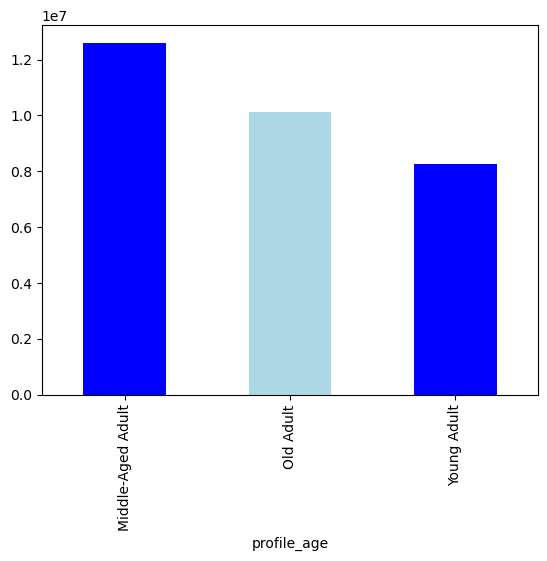

In [120]:
bar_age = merged_df['profile_age'].value_counts().plot.bar(color = ['blue', 'lightblue'])

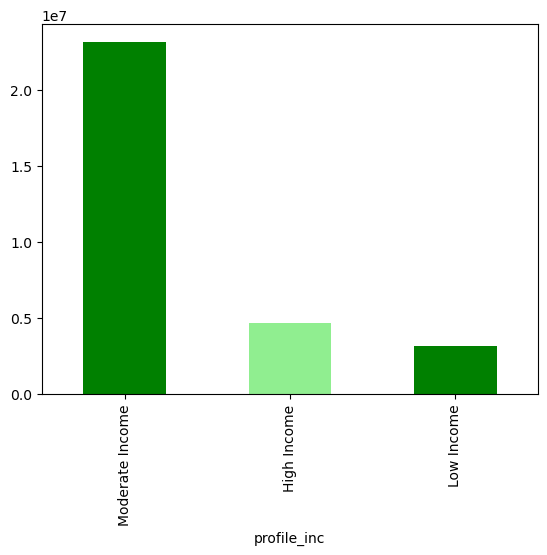

In [121]:
bar_inc = merged_df['profile_inc'].value_counts().plot.bar(color = ['green', 'lightgreen'])

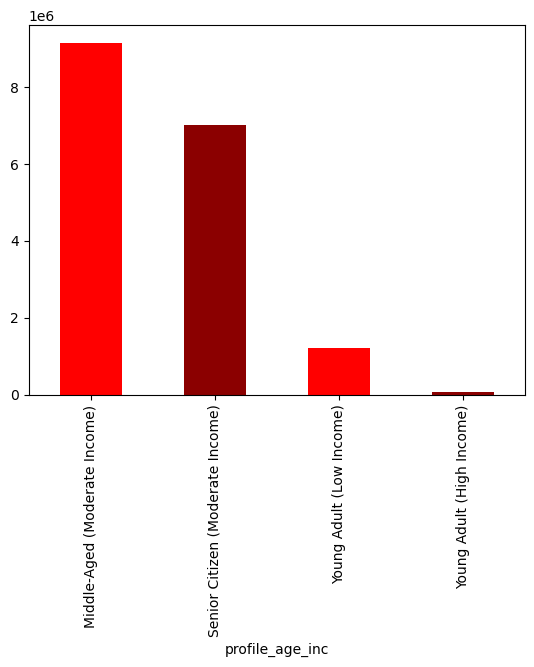

In [122]:
bar_age_inc = merged_df['profile_age_inc'].value_counts().plot.bar(color = ['red', 'darkred'])

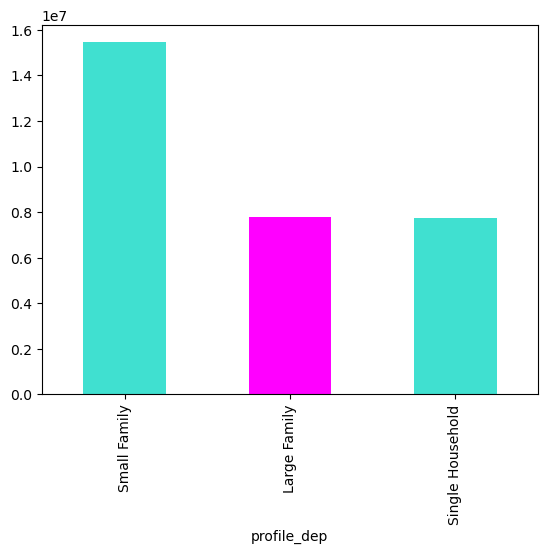

In [123]:
bar_dep = merged_df['profile_dep'].value_counts().plot.bar(color = ['turquoise', 'fuchsia'])

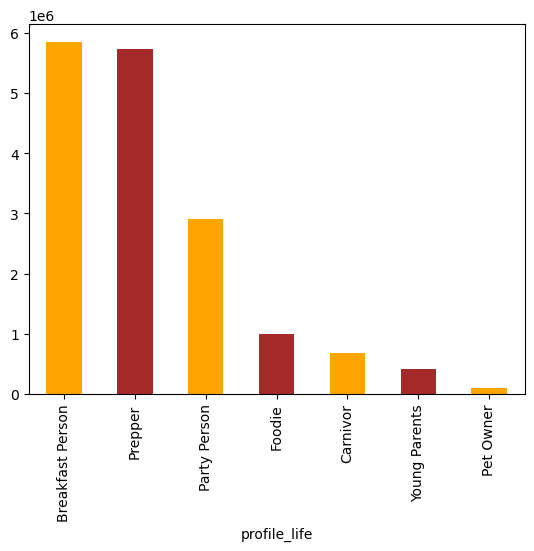

In [124]:
bar_life = merged_df['profile_life'].value_counts().plot.bar(color = ['orange', 'brown'])

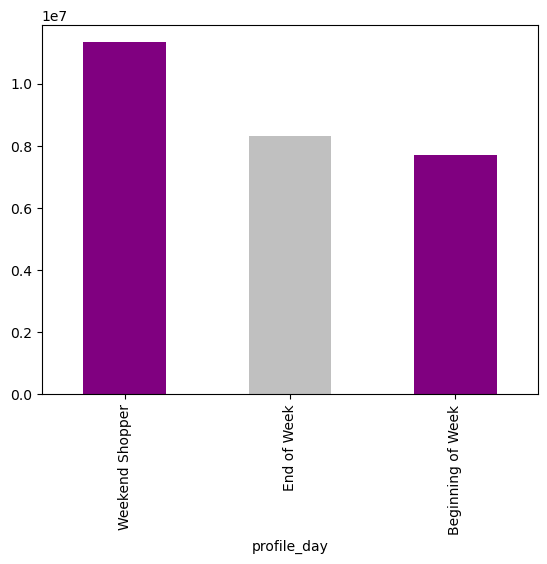

In [125]:
bar_day = merged_df['profile_day'].value_counts().plot.bar(color = ['purple', 'silver'])

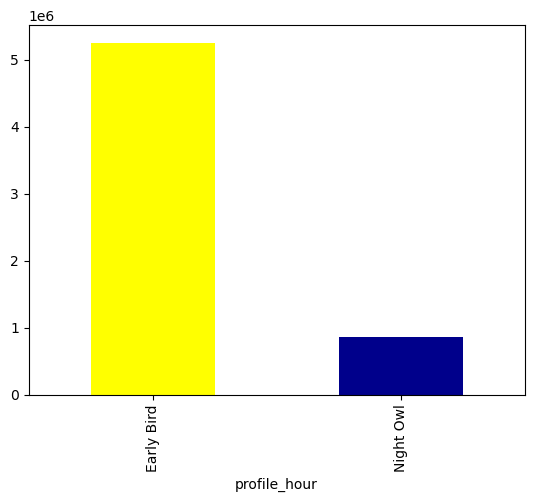

In [126]:
bar_hour = merged_df['profile_hour'].value_counts().plot.bar(color = ['yellow', 'darkblue'])

## 4.2 Aggregating max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [127]:
merged_df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_hours', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'order_regularity', 'order regularity flag',
       'average_spend', 'spending flag', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', '_merge',
       'region', 'activity flag', 'department', 'profile_age', 'profile_inc',
       'profile_age_inc', 'profile_dep', 'profile_life', 'profile_day',
       'profile_hour'],
      dtype='object')

In [128]:
# Age groups
sum_age = merged_df.groupby('profile_age').agg({'order_regularity': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})
sum_age

order_regularity               prices           
                              mean  min   max      mean  min   max
profile_age                                                       
Middle-Aged Adult         9.968158  0.0  30.0  7.789805  1.0  25.0
Old Adult                 9.941589  0.0  30.0  7.796144  1.0  25.0
Young Adult               9.959362  0.0  30.0  7.784978  1.0  25.0

In [129]:
# Income groups
sum_inc = merged_df.groupby('profile_inc').agg({'order_regularity': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})
sum_inc

order_regularity               prices           
                            mean  min   max      mean  min   max
profile_inc                                                     
High Income             9.811181  0.0  30.0  7.943054  1.0  25.0
Low Income             10.543977  0.0  30.0  6.682987  1.0  25.0
Moderate Income         9.906911  0.0  30.0  7.910370  1.0  25.0

In [130]:
# Age and income combined
sum_age_inc = merged_df.groupby('profile_age_inc').agg({'order_regularity': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})
sum_age_inc

order_regularity               prices       \
                                             mean  min   max      mean  min   
profile_age_inc                                                               
Middle-Aged (Moderate Income)            9.916701  0.0  30.0  7.901677  1.0   
Senior Citizen (Moderate Income)         9.929371  0.0  30.0  7.885096  1.0   
Young Adult (High Income)                9.094767  2.0  30.0  7.820354  1.0   
Young Adult (Low Income)                10.520105  0.0  30.0  6.851198  1.0   

                                        
                                   max  
profile_age_inc                         
Middle-Aged (Moderate Income)     25.0  
Senior Citizen (Moderate Income)  25.0  
Young Adult (High Income)         25.0  
Young Adult (Low Income)          25.0

In [131]:
# Household size
sum_dep = merged_df.groupby('profile_dep').agg({'order_regularity': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})
sum_dep

order_regularity               prices           
                             mean  min   max      mean  min   max
profile_dep                                                      
Large Family             9.949826  0.0  30.0  7.792886  1.0  25.0
Single Household         9.936569  0.0  30.0  7.789550  1.0  25.0
Small Family             9.971122  0.0  30.0  7.789957  1.0  25.0

In [132]:
# Lifestyle
sum_life = merged_df.groupby('profile_life').agg({'order_regularity': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})
sum_life

order_regularity                prices           
                             mean  min   max       mean  min   max
profile_life                                                      
Breakfast Person         9.775866  0.0  30.0   8.301387  1.0  15.0
Carnivor                10.262827  0.0  30.0  16.300034  8.0  25.0
Foodie                  10.161714  0.0  30.0   7.783347  1.0  15.0
Party Person             9.919522  0.0  30.0   4.468081  1.0  15.0
Pet Owner               10.697905  0.0  30.0   7.887489  1.0  15.0
Prepper                 10.426590  0.0  30.0   7.732887  1.0  20.0
Young Parents            8.758564  0.0  30.0   7.634399  1.0  15.0

In [133]:
# Usual shopping days
sum_day = merged_df.groupby('profile_day').agg({'order_regularity': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})
sum_day

order_regularity               prices           
                              mean  min   max      mean  min   max
profile_day                                                       
Beginning of Week         9.891722  0.0  30.0  7.755813  1.0  25.0
End of Week               9.879075  0.0  30.0  7.811058  1.0  25.0
Weekend Shopper          10.172253  0.0  30.0  7.810085  1.0  25.0

In [134]:
# Usual shopping hours
sum_hour = merged_df.groupby('profile_hour').agg({'order_regularity': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})
sum_hour

order_regularity               prices           
                         mean  min   max      mean  min   max
profile_hour                                                 
Early Bird           9.206572  0.0  30.0  7.780335  1.0  25.0
Night Owl           10.279348  0.0  30.0  7.806652  1.0  25.0

# 5. Comparing customer profiles with regions and departments

In [135]:
# Age groups region
Age_group_reg = pd.crosstab(merged_df['profile_age'], merged_df['region'], dropna = False)
Age_group_reg

region,Region 1 (Northeast),Region 2 (Midwest),Region 3 (South),Region 4 (West)
profile_age,,,,
Middle-Aged Adult,2187597,2992870,4181452,3247743
Old Adult,1809013,2356770,3361229,2585595
Young Adult,1468075,1911873,2768458,2093889


In [136]:
# Age groups department
Age_group_dep = pd.crosstab(merged_df['department'], merged_df['profile_age'], dropna = False)
Age_group_dep

profile_age,Middle-Aged Adult,Old Adult,Young Adult
department,,,
alcohol,58782,45628,40217
babies,170073,133019,107300
bakery,456090,366017,298721
beverages,1050197,844687,677017
breakfast,272988,217539,180323
bulk,13501,10929,9021
canned goods,411804,329485,270785
dairy eggs,2102937,1687944,1386301
deli,408397,328967,266470


In [137]:
# Income groups region
Inc_group_reg = pd.crosstab(merged_df['profile_inc'], merged_df['region'], dropna = False)
Inc_group_reg 

region,Region 1 (Northeast),Region 2 (Midwest),Region 3 (South),Region 4 (West)
profile_inc,,,,
High Income,824703,1105549,1554395,1205443
Low Income,548340,732477,1068988,796319
Moderate Income,4091642,5423487,7687756,5925465


In [138]:
# Income groups department
Inc_group_dep = pd.crosstab(merged_df['department'], merged_df['profile_inc'], dropna = False)
Inc_group_dep

profile_inc,High Income,Low Income,Moderate Income
department,,,
alcohol,27396,16851,100380
babies,64943,27030,318419
bakery,177575,99868,843385
beverages,375267,360861,1835773
breakfast,99773,86117,484960
bulk,4440,4324,24687
canned goods,160104,73594,778376
dairy eggs,795009,469243,3912930
deli,151666,99826,752342


In [139]:
# Age & Income groups region
Inc_age_group_reg = pd.crosstab(merged_df['profile_age_inc'], merged_df['region'], dropna = False)
Inc_age_group_reg 

region,Region 1 (Northeast),Region 2 (Midwest),Region 3 (South),Region 4 (West)
profile_age_inc,,,,
Middle-Aged (Moderate Income),1580112,2184220,3041289,2350830
Senior Citizen (Moderate Income),1264624,1636925,2312837,1804962
Young Adult (High Income),12513,17654,28121,19767
Young Adult (Low Income),208656,291877,406707,304449


In [140]:
# Age & Income department
Inc_age_group_dep = pd.crosstab(merged_df['department'], merged_df['profile_age_inc'], dropna = False)
Inc_age_group_dep

profile_age_inc,Middle-Aged (Moderate Income),Senior Citizen (Moderate Income),Young Adult (High Income),Young Adult (Low Income)
department,,,,
alcohol,40046,28852,2343,6392
babies,129107,94637,498,12127
bakery,333156,254629,3824,39297
beverages,734466,562792,7205,131297
breakfast,192511,145743,1930,31687
bulk,9628,7667,11,1618
canned goods,306652,234261,2961,30361
dairy eggs,1544426,1182671,13679,186789
deli,297096,229796,2005,39015


In [141]:
# Household size department
dep_dep = pd.crosstab(merged_df['department'], merged_df['profile_dep'], dropna = False)
dep_dep

profile_dep,Large Family,Single Household,Small Family
department,,,
alcohol,37333,36827,70467
babies,102585,103328,204479
bakery,279822,281395,559611
beverages,640927,645341,1285633
breakfast,167322,166432,337096
bulk,8403,8000,17048
canned goods,255325,251020,505729
dairy eggs,1296264,1294376,2586542
deli,252592,253382,497860


In [142]:
# Household size region
dep_reg = pd.crosstab(merged_df['profile_dep'], merged_df['region'], dropna = False)
dep_reg

region,Region 1 (Northeast),Region 2 (Midwest),Region 3 (South),Region 4 (West)
profile_dep,,,,
Large Family,1381233,1787286,2585864,2018133
Single Household,1354482,1822816,2581933,1980450
Small Family,2728970,3651411,5143342,3928644


In [143]:
# Lifestyle region
life_reg = pd.crosstab(merged_df['profile_life'], merged_df['region'], dropna = False)
life_reg 

region,Region 1 (Northeast),Region 2 (Midwest),Region 3 (South),Region 4 (West)
profile_life,,,,
Breakfast Person,1032520,1368645,1946188,1500679
Carnivor,118571,158260,224120,173830
Foodie,178398,234464,333620,257352
Party Person,518171,679186,965593,748083
Pet Owner,17734,21358,29909,24059
Prepper,1003920,1349481,1911931,1473314
Young Parents,72712,95741,139511,102428


In [144]:
# Usual shopping day department
day_dep = pd.crosstab(merged_df['department'], merged_df['profile_day'], dropna = False)
day_dep

profile_day,Beginning of Week,End of Week,Weekend Shopper
department,,,
alcohol,40420,43816,35576
babies,105710,105115,149618
bakery,277795,302576,409085
beverages,685396,685716,875044
breakfast,172998,174709,242099
bulk,8510,9027,12058
canned goods,238367,277821,386236
dairy eggs,1291158,1388691,1887697
deli,245722,267575,376039


In [145]:
# Usual shopping day region
day_reg = pd.crosstab(merged_df['profile_day'], merged_df['region'], dropna = False)
day_reg 

region,Region 1 (Northeast),Region 2 (Midwest),Region 3 (South),Region 4 (West)
profile_day,,,,
Beginning of Week,1362464,1802686,2569389,1959702
End of Week,1466410,1953482,2772553,2132588
Weekend Shopper,1998030,2653844,3763700,2904722


In [146]:
# Usual shopping hour department
hour_dep = pd.crosstab(merged_df['department'], merged_df['profile_hour'], dropna = False)
hour_dep

profile_hour,Early Bird,Night Owl
department,,
alcohol,17803,2178
babies,83671,10242
bakery,193326,29196
beverages,442232,69632
breakfast,124987,17953
bulk,5726,996
canned goods,160621,28715
dairy eggs,929718,138995
deli,162824,27600


In [147]:
# Usual shopping hour region
hour_reg = pd.crosstab(merged_df['profile_hour'], merged_df['region'], dropna = False)
hour_reg 

region,Region 1 (Northeast),Region 2 (Midwest),Region 3 (South),Region 4 (West)
profile_hour,,,,
Early Bird,926015,1223062,1764866,1337422
Night Owl,158491,201869,288968,218139


## 5.1 Comparing visualizations

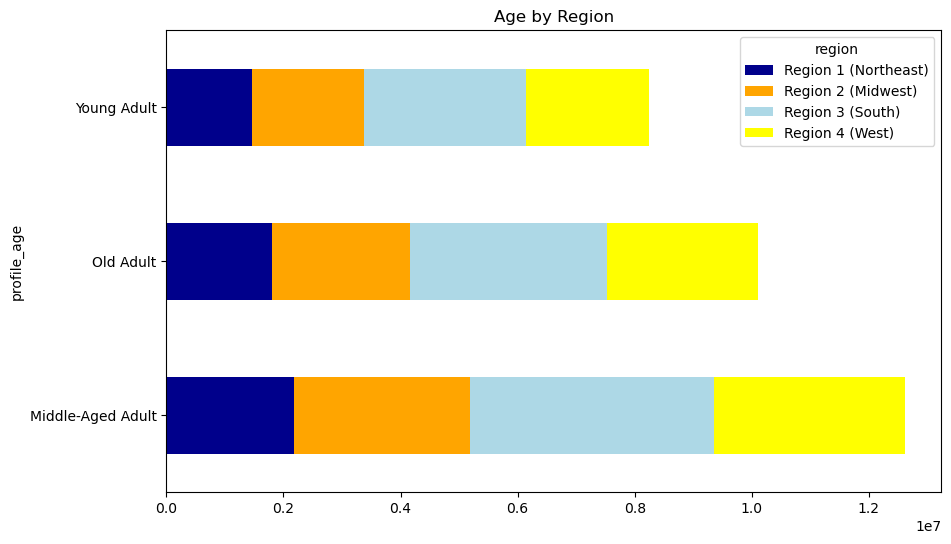

In [148]:
age_group_reg_bar = Age_group_reg.plot.barh(stacked = True, title = 'Age by Region', color = ['darkblue', 'orange', 'lightblue', 'yellow'], figsize=(10, 6))

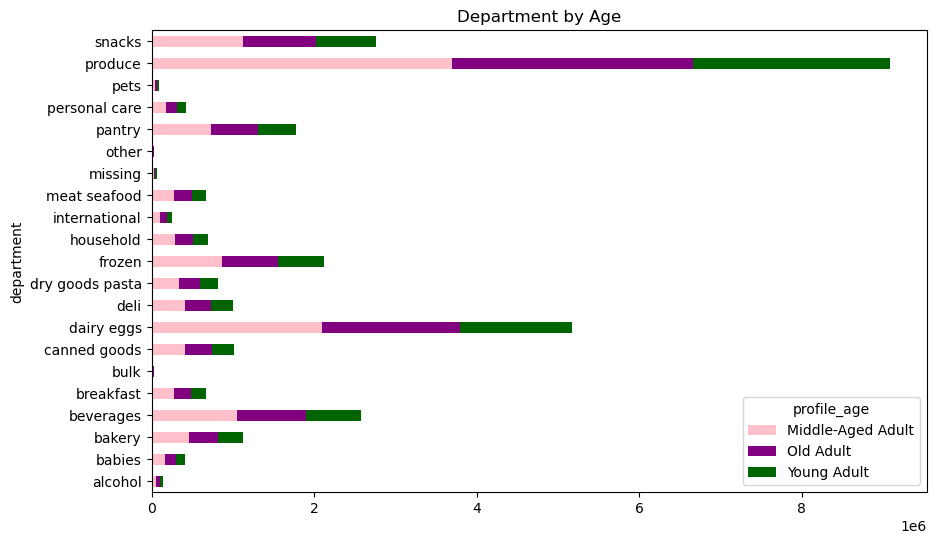

In [149]:
age_group_dep_bar = Age_group_dep.plot.barh(stacked = True, title = 'Department by Age', color = ['pink', 'purple', 'darkgreen', 'lightgreen'], figsize=(10, 6))

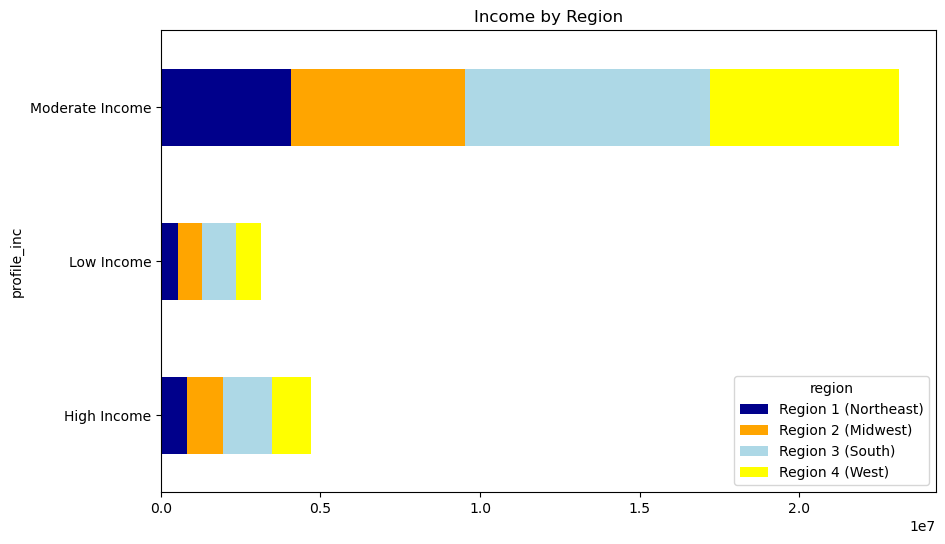

In [150]:
income_reg_bar = Inc_group_reg.plot.barh(stacked = True, title = 'Income by Region', color = ['darkblue', 'orange', 'lightblue', 'yellow'], figsize=(10, 6))

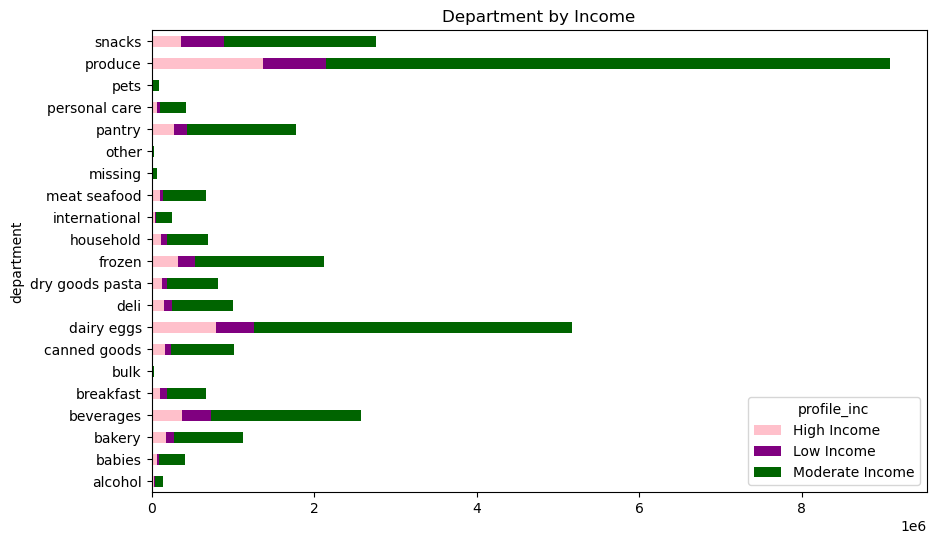

In [151]:
income_dep_bar = Inc_group_dep.plot.barh(stacked = True, title = 'Department by Income', color = ['pink', 'purple', 'darkgreen', 'lightgreen'], figsize=(10, 6))

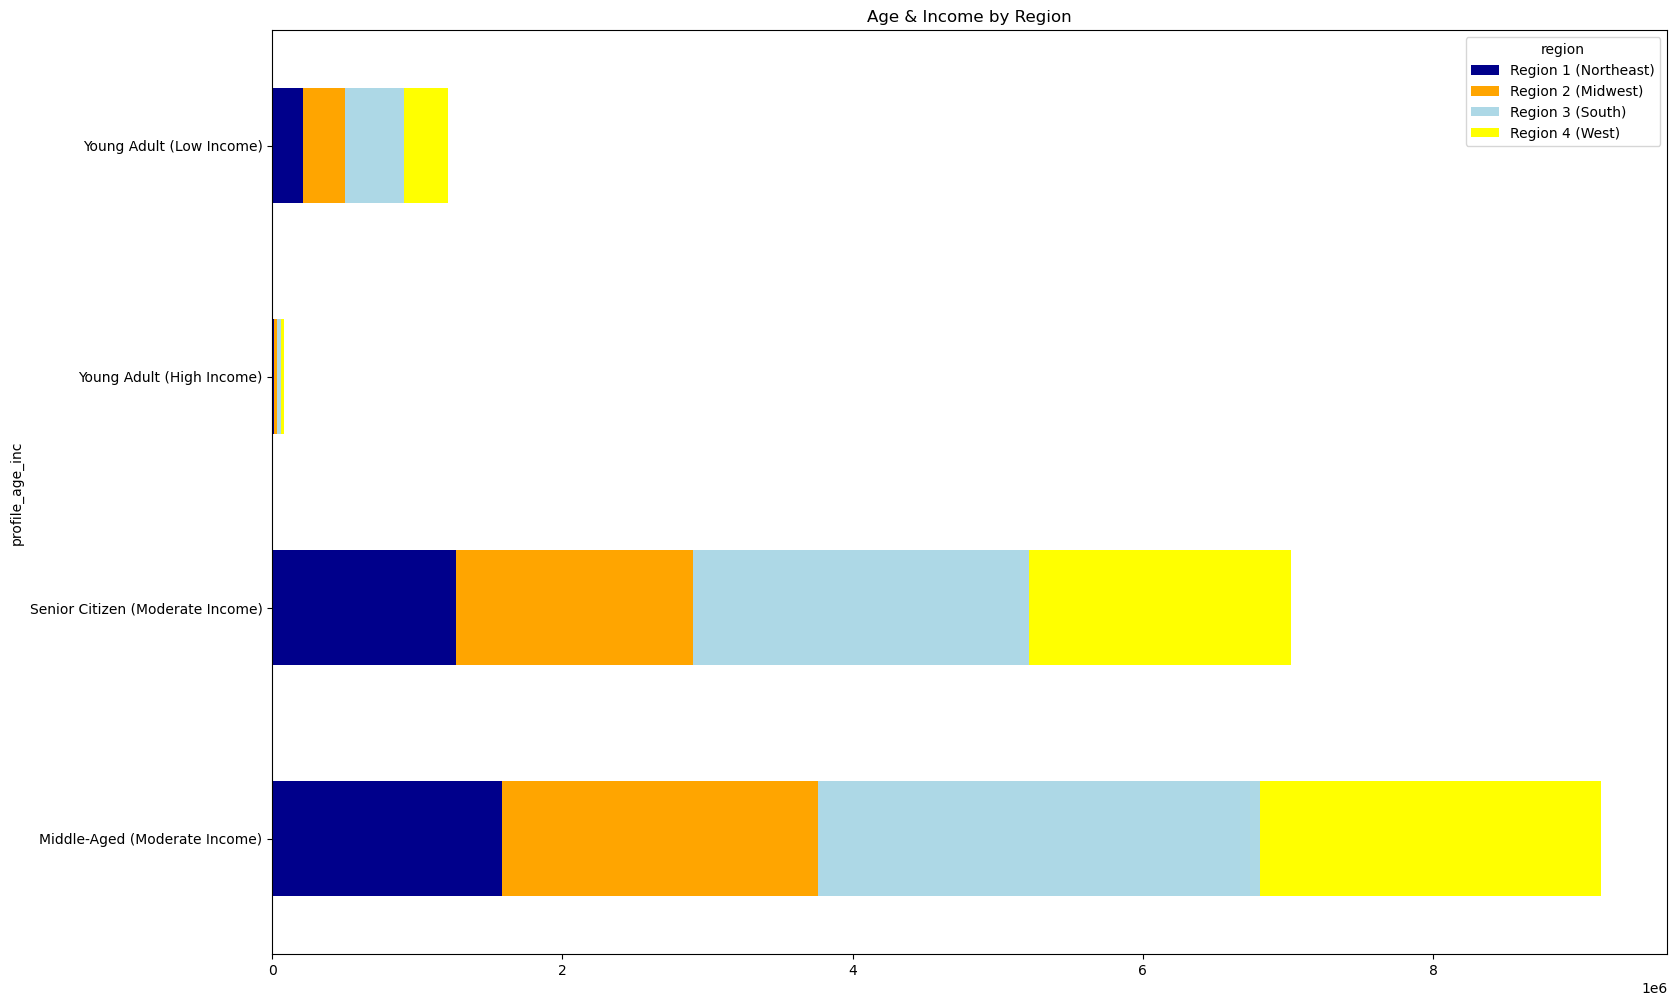

In [163]:
age_income_reg_bar = Inc_age_group_reg.plot.barh(stacked = True, title = 'Age & Income by Region', color = ['darkblue', 'orange', 'lightblue', 'yellow'], figsize=(18, 12))

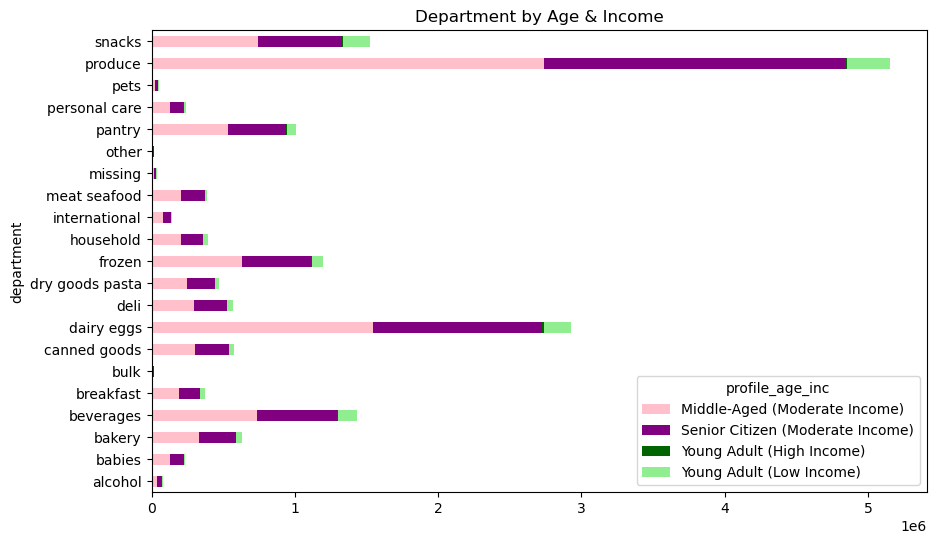

In [153]:
age_income_dep_bar = Inc_age_group_dep.plot.barh(stacked = True, title = 'Department by Age & Income', color = ['pink', 'purple', 'darkgreen', 'lightgreen'], figsize=(10, 6))

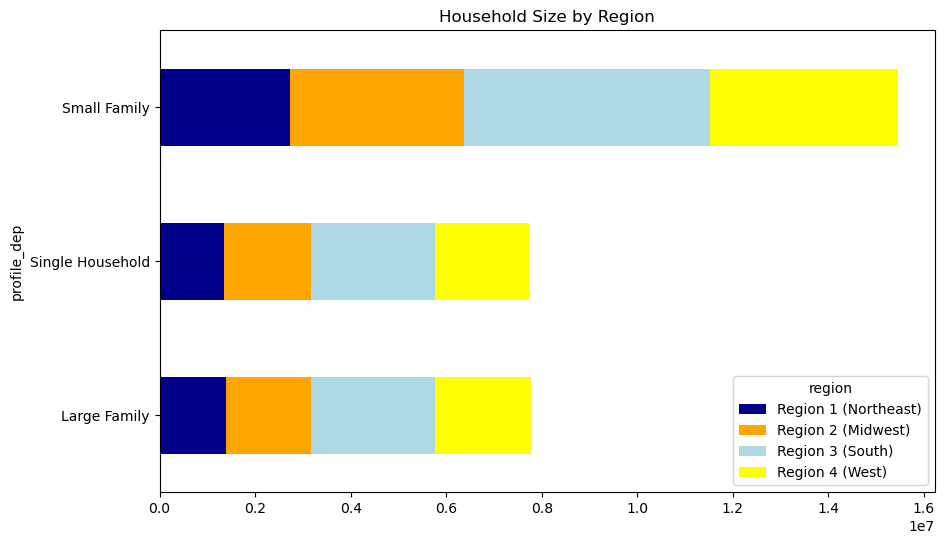

In [154]:
dep_reg_bar = dep_reg.plot.barh(stacked = True, title = 'Household Size by Region', color = ['darkblue', 'orange', 'lightblue', 'yellow'], figsize=(10, 6))

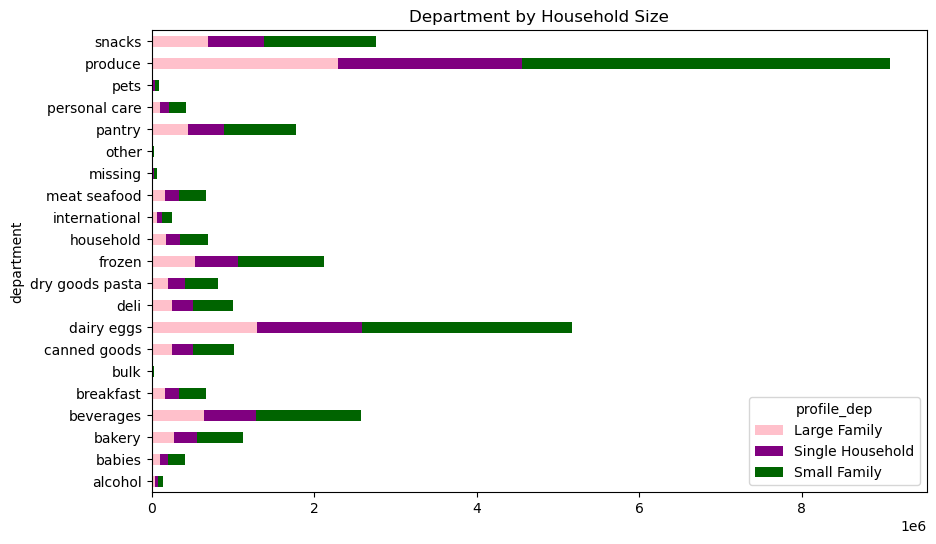

In [155]:
dep_dep_bar = dep_dep.plot.barh(stacked = True, title = 'Department by Household Size', color = ['pink', 'purple', 'darkgreen', 'lightgreen'], figsize=(10, 6))

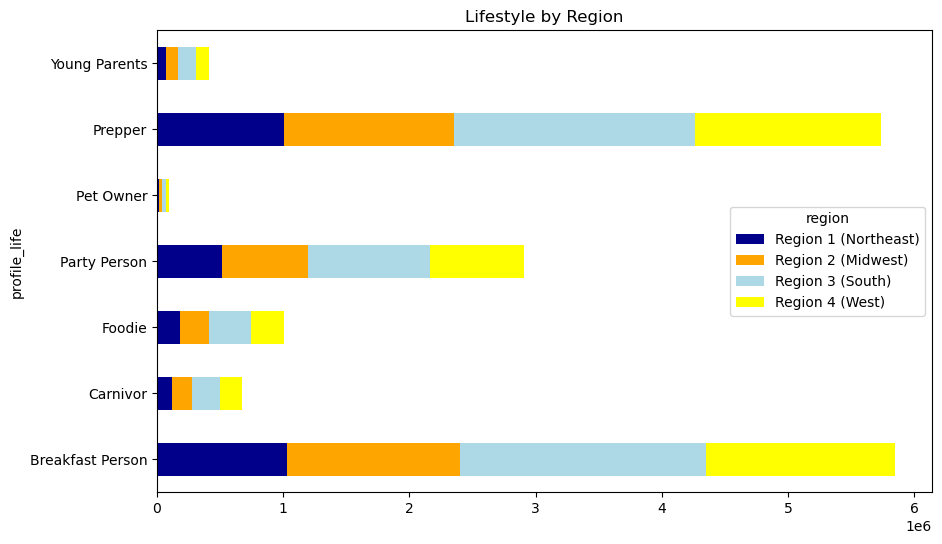

In [156]:
life_reg_bar = life_reg.plot.barh(stacked = True, title = 'Lifestyle by Region', color = ['darkblue', 'orange', 'lightblue', 'yellow'], figsize=(10, 6))

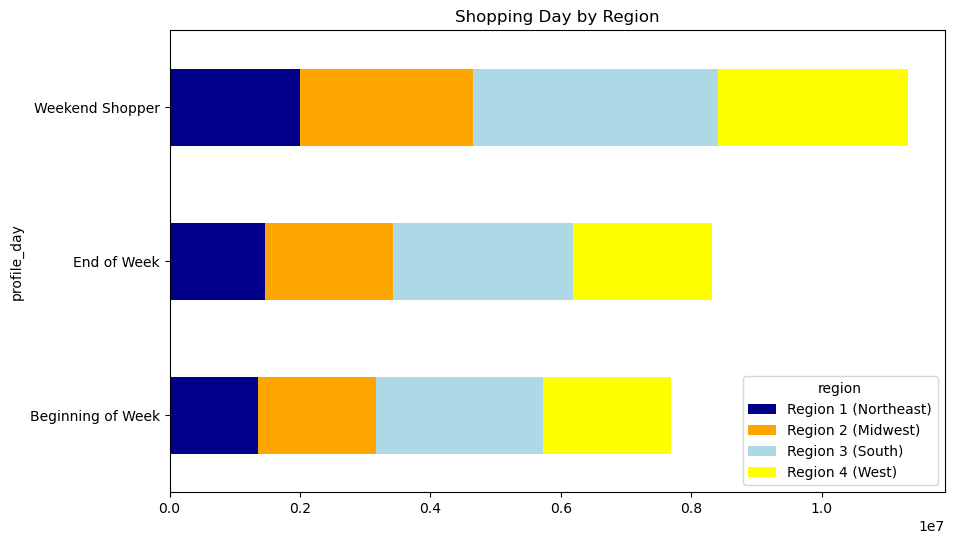

In [157]:
day_reg_bar = day_reg.plot.barh(stacked = True, title = 'Shopping Day by Region', color = ['darkblue', 'orange', 'lightblue', 'yellow'], figsize=(10, 6))

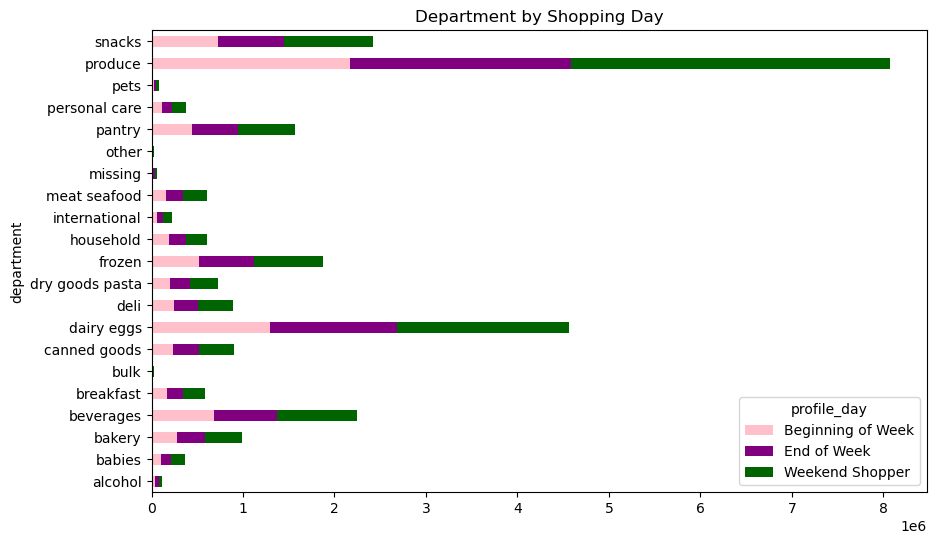

In [158]:
day_dep_bar = day_dep.plot.barh(stacked = True, title = 'Department by Shopping Day', color = ['pink', 'purple', 'darkgreen', 'lightgreen'], figsize=(10, 6))

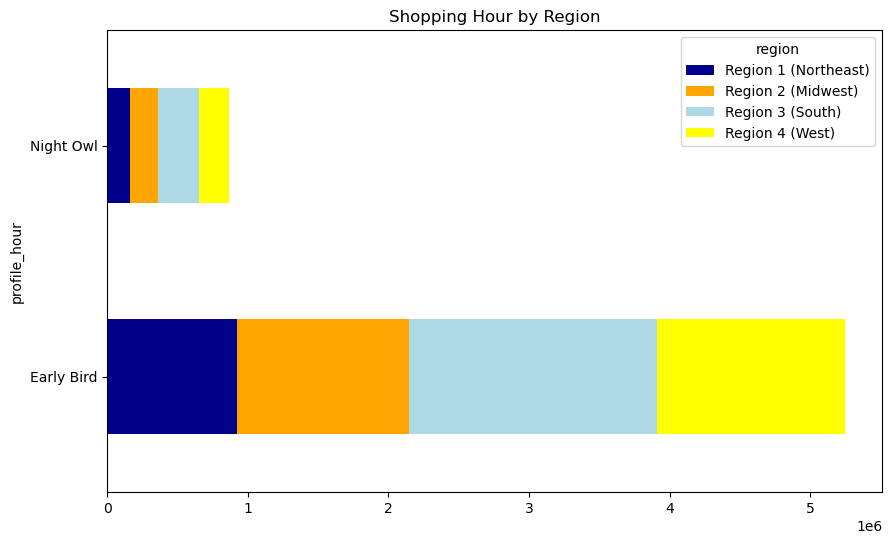

In [159]:
hour_reg_bar = hour_reg.plot.barh(stacked = True, title = 'Shopping Hour by Region', color = ['darkblue', 'orange', 'lightblue', 'yellow'], figsize=(10, 6))

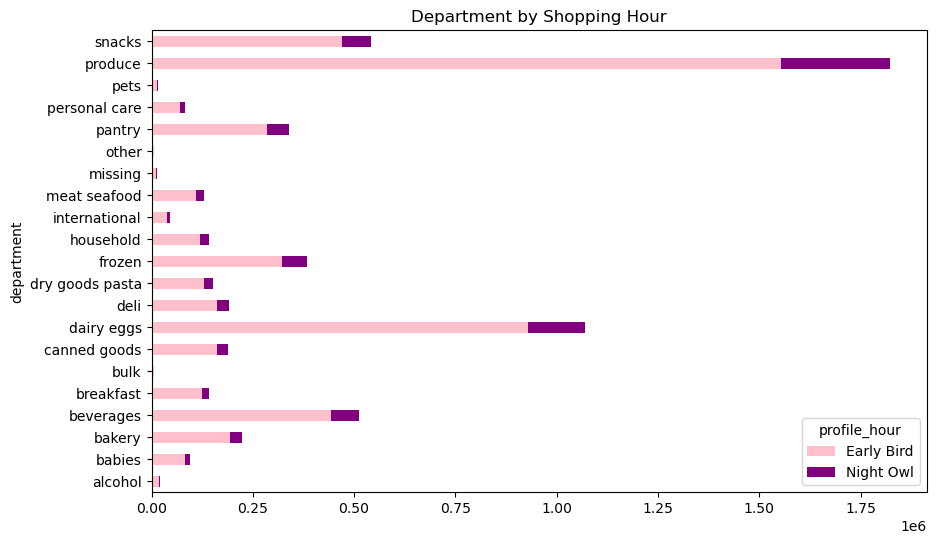

In [160]:
hour_dep_bar = hour_dep.plot.barh(stacked = True, title = 'Department by Shopping Hour', color = ['pink', 'purple', 'darkgreen', 'lightgreen'], figsize=(10, 6))

In [164]:
# Exporting all plots
age_group_reg_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_group_reg_bar.png'))
age_group_dep_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_group_dep_bar.png'))
income_reg_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_reg_bar.png'))
income_dep_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_dep_bar.png'))
age_income_reg_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_income_reg_bar.png'))
age_income_dep_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_income_dep_bar.png'))
dep_reg_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dep_reg_bar.png'))
dep_dep_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dep_dep_bar.png'))
life_reg_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'life_reg_bar.png'))
day_reg_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'day_reg_bar.png'))
day_dep_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'day_dep_bar.png'))
hour_reg_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hour_reg_bar.png'))
hour_dep_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hour_dep_bar.png'))

In [294]:
# Exporting data frame
# Export data to pkl
merged_df.to_pickle(os.path.join(path, 'Data', 'prepared data ', 'instacard_customer_analyses.pkl'))